In [1]:
import re, os, glob
import pandas as pd
import feather
from collections import Counter

In [2]:
stop_words = ['а', 'в', 'г', 'е', 'фейк', 'ж', 'и', 'к', 'м', 'о', 'с', 'т', 'у', 'я', 'бы', 'во', 'вы', 'да', 'до', 'ее', 'ей', 'ею', 'её', 'же', 'за', 'из', 'им', 'их', 'ли', 'мы', 'на', 'не', 'ни', 'но', 'ну', 'нх', 'об', 'он', 'от', 'по', 'со', 'та', 'те', 'то', 'ту', 'ты', 'уж', 'без', 'был', 'вам', 'вас', 'ваш', 'вон', 'вот', 'все', 'всю', 'вся', 'всё', 'где', 'год', 'два', 'две', 'дел', 'для', 'его', 'ему', 'еще', 'ещё', 'или', 'ими', 'имя', 'как', 'кем', 'ком', 'кто', 'лет', 'мне', 'мог', 'мож', 'мои', 'мой', 'мор', 'моя', 'моё', 'над', 'нам', 'нас', 'наш', 'нее', 'ней', 'нем', 'нет', 'нею', 'неё', 'них', 'оба', 'она', 'они', 'оно', 'под', 'пор', 'при', 'про', 'раз', 'сам', 'сих', 'так', 'там', 'тем', 'тех', 'том', 'тот', 'тою', 'три', 'тут', 'уже', 'чем', 'что', 'эта', 'эти', 'это', 'эту', 'алло', 'буду', 'будь', 'бывь', 'была', 'были', 'было', 'быть', 'вами', 'ваша', 'ваше', 'ваши', 'ведь', 'весь', 'вниз', 'всем', 'всех', 'всею', 'года', 'году', 'даже', 'двух', 'день', 'если', 'есть', 'зато', 'кого', 'кому', 'куда', 'лишь', 'люди', 'мало', 'меля', 'меня', 'мимо', 'мира', 'мной', 'мною', 'мочь', 'надо', 'нами', 'наша', 'наше', 'наши', 'него', 'нему', 'ниже', 'ними', 'один', 'пока', 'пора', 'пять', 'рано', 'сама', 'сами', 'само', 'саму', 'свое', 'свои', 'свою', 'себе', 'себя', 'семь', 'стал', 'суть', 'твой', 'твоя', 'твоё', 'тебе', 'тебя', 'теми', 'того', 'тоже', 'тому', 'туда', 'хоть', 'хотя', 'чаще', 'чего', 'чему', 'чтоб', 'чуть', 'этим', 'этих', 'этой', 'этом', 'этот', 'более', 'будем', 'будет', 'будто', 'будут', 'вверх', 'вдали', 'вдруг', 'везде', 'внизу', 'время', 'всего', 'всеми', 'всему', 'всюду', 'давно', 'даром', 'долго', 'друго', 'жизнь', 'занят', 'затем', 'зачем', 'здесь', 'иметь', 'какая', 'какой', 'когда', 'кроме', 'лучше', 'между', 'менее', 'много', 'могут', 'может', 'можно', 'можхо', 'назад', 'низко', 'нужно', 'одной', 'около', 'опять', 'очень', 'перед', 'позже', 'после', 'потом', 'почти', 'пятый', 'разве', 'рядом', 'самим', 'самих', 'самой', 'самом', 'своей', 'своих', 'сеаой', 'снова', 'собой', 'собою', 'такая', 'также', 'такие', 'такое', 'такой', 'тобой', 'тобою', 'тогда', 'тысяч', 'уметь', 'часто', 'через', 'чтобы', 'шесть', 'этими', 'этого', 'этому', 'близко', 'больше', 'будете', 'будешь', 'бывает', 'важная', 'важное', 'важные', 'важный', 'вокруг', 'восемь', 'всегда', 'второй', 'далеко', 'дальше', 'девять', 'десять', 'должно', 'другая', 'другие', 'других', 'другое', 'другой', 'занята', 'занято', 'заняты', 'значит', 'именно', 'иногда', 'каждая', 'каждое', 'каждые', 'каждый', 'кругом', 'меньше', 'начала', 'нельзя', 'нибудь', 'никуда', 'ничего', 'обычно', 'однако', 'одного', 'отсюда', 'первый', 'потому', 'почему', 'просто', 'против', 'раньше', 'самими', 'самого', 'самому', 'своего', 'сейчас', 'сказал', 'совсем', 'теперь', 'только', 'третий', 'хорошо', 'хотеть', 'хочешь', 'четыре', 'шестой', 'восьмой', 'впрочем', 'времени', 'говорил', 'говорит', 'девятый', 'десятый', 'кажется', 'конечно', 'которая', 'которой', 'которые', 'который', 'которых', 'наверху', 'наконец', 'недавно', 'немного', 'нередко', 'никогда', 'однажды', 'посреди', 'сегодня', 'седьмой', 'сказала', 'сказать', 'сколько', 'слишком', 'сначала', 'спасибо', 'человек', 'двадцать', 'довольно', 'которого', 'наиболее', 'недалеко', 'особенно', 'отовсюду', 'двадцатый', 'миллионов', 'несколько', 'прекрасно', 'процентов', 'четвертый', 'двенадцать', 'непрерывно', 'пожалуйста', 'пятнадцать', 'семнадцать', 'тринадцать', 'двенадцатый', 'одиннадцать', 'пятнадцатый', 'семнадцатый', 'тринадцатый', 'шестнадцать', 'восемнадцать', 'девятнадцать', 'одиннадцатый', 'четырнадцать', 'шестнадцатый', 'восемнадцатый', 'девятнадцатый', 'действительно', 'четырнадцатый', 'многочисленная', 'многочисленное', 'многочисленные', 'многочисленный', "я", "мы", "ты", "oни", "нас", "вы", "тебя", "меня", "тебе", "вами", "мне", "тысяч", "котор"]

In [3]:
dire = '../ftrs/Pronouns/'
lt = [x[0] for x in os.walk(dire)]

flat_list = []
for ftr_dir in lt[1:]:
    # Uses the json_dir variable to navigate to the dataset directory and 'get' all json files
    ftr_pattern = os.path.join(ftr_dir, '*.ftr')

    file_list = glob.glob(ftr_pattern)
    
    for i in file_list:
        read_ftr = pd.read_feather(i, columns=None, use_threads=True)
        ls = read_ftr["text"].tolist()

        flat_list = flat_list + [item for sublist in ls for item in sublist]

exclude = ["you", "i", "they", "we", "trump", "me", "my", "dont", "u", "trump", "therealdonaldtrump","youre"]
top_200 = Counter(" ".join(flat_list).split()).most_common(200)

In [4]:
l = []

for k,v in top_200[100:]:
    if k not in stop_words and len(k) > 3:
        l.append((k,v))
print(l)

[('эфир', 5735), ('восем', 5635), ('прав', 5622), ('пыта', 5564), ('российск', 5507), ('карантин', 5437), ('сторон', 5418), ('четыр', 5338), ('плох', 5308), ('реальн', 5273), ('част', 5255), ('работ', 5228), ('факт', 5201), ('сорок', 5188), ('шестьдес', 5123), ('истор', 5118), ('никак', 5080), ('должн', 5044), ('чита', 5028), ('случа', 5018), ('семьдес', 5014), ('бузов', 4973), ('шест', 4948), ('русск', 4906), ('ситуац', 4887), ('мест', 4875), ('бородин', 4869), ('поня', 4817), ('украин', 4758), ('мног', 4733), ('поэт', 4714), ('никт', 4665), ('информац', 4653), ('девя', 4638), ('пятьдес', 4627), ('прям', 4609), ('шлок', 4602), ('блят', 4582), ('личн', 4573), ('youtube', 4521), ('cовиддевятнадца', 4484), ('чтот', 4464), ('девян', 4411), ('москв', 4354), ('интересн', 4352), ('государств', 4321), ('вирус', 4263), ('восемьдес', 4187), ('ответ', 4174), ('скор', 4162), ('стат', 4133), ('выбор', 4064), ('хорош', 3923), ('пропаганд', 3904), ('написа', 3903), ('чувств', 3897), ('двест', 3854),

In [5]:
for i, j in enumerate(l):
    if i == 10:
        break
    print(j)

('эфир', 5735)
('восем', 5635)
('прав', 5622)
('пыта', 5564)
('российск', 5507)
('карантин', 5437)
('сторон', 5418)
('четыр', 5338)
('плох', 5308)
('реальн', 5273)


In [6]:
l_count=0
for k,v in l:
    l_count+=v
one=5735/l_count
two = 5635/l_count
three = 5622/l_count
four = 5564/l_count
five = 5507/l_count
total = one+two+three+four+five
print(total)

#15.6

0.07886697749187105


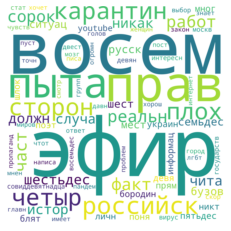

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1920,height=1920, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict(l))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
import re, os, glob
import pandas as pd
import feather
from collections import Counter

ftr_dir = '../ftrs/'

# Uses the json_dir variable to navigate to the dataset directory and 'get' all json files
ftr_pattern = os.path.join(ftr_dir, '*.ftr')

file_list_2 = glob.glob(ftr_pattern)

flat_list_2 = []

for i in file_list_2:
    read_ftr = pd.read_feather(i, columns=None, use_threads=True)
    ls_2 = read_ftr["text"].tolist()

    flat_list_2 = flat_list_2 + [item for sublist in ls_2 for item in sublist if len(item) > 3]

In [9]:
top_200_2 = Counter(" ".join(flat_list_2[:17659594]).split()).most_common(200)

In [10]:
print(top_200_2[100:])

[('част', 16235), ('двест', 16037), ('интернет', 15992), ('главн', 15986), ('эпидем', 15872), ('реальн', 15772), ('поня', 15721), ('ответ', 15708), ('город', 15701), ('опровергл', 15599), ('фейк', 15554), ('истор', 15416), ('имеет', 15369), ('стат', 15248), ('никт', 15180), ('скор', 15124), ('интересн', 15002), ('пуст', 14952), ('прям', 14935), ('сторон', 14795), ('закон', 14780), ('женщин', 14743), ('распространен', 14742), ('поэт', 14637), ('блят', 14562), ('знает', 14519), ('семьсот', 14465), ('политик', 14345), ('появ', 14342), ('здоров', 14229), ('мозг', 14214), ('пропаганд', 14207), ('созда', 14110), ('школ', 14071), ('пост', 13912), ('рубл', 13899), ('бактериологическ', 13744), ('виде', 13743), ('сред', 13639), ('пандем', 13613), ('антидот', 13478), ('глав', 13394), ('чувств', 13384), ('деся', 13367), ('чтот', 13299), ('давн', 13261), ('ответствен', 13144), ('недел', 13106), ('трист', 13051), ('опроверг', 12802), ('компан', 12779), ('мног', 12776), ('личн', 12759), ('хорош', 127

In [11]:
#top_200_2[100:]

l_2 = []

for k,v in top_200_2[100:]:
    if k not in stop_words and len(k) > 3:
        l_2.append((k,v))
print(l_2)

[('част', 16235), ('двест', 16037), ('интернет', 15992), ('главн', 15986), ('эпидем', 15872), ('реальн', 15772), ('поня', 15721), ('ответ', 15708), ('город', 15701), ('опровергл', 15599), ('истор', 15416), ('имеет', 15369), ('стат', 15248), ('никт', 15180), ('скор', 15124), ('интересн', 15002), ('пуст', 14952), ('прям', 14935), ('сторон', 14795), ('закон', 14780), ('женщин', 14743), ('распространен', 14742), ('поэт', 14637), ('блят', 14562), ('знает', 14519), ('семьсот', 14465), ('политик', 14345), ('появ', 14342), ('здоров', 14229), ('мозг', 14214), ('пропаганд', 14207), ('созда', 14110), ('школ', 14071), ('пост', 13912), ('рубл', 13899), ('бактериологическ', 13744), ('виде', 13743), ('сред', 13639), ('пандем', 13613), ('антидот', 13478), ('глав', 13394), ('чувств', 13384), ('деся', 13367), ('чтот', 13299), ('давн', 13261), ('ответствен', 13144), ('недел', 13106), ('трист', 13051), ('опроверг', 12802), ('компан', 12779), ('мног', 12776), ('личн', 12759), ('хорош', 12706), ('рассказа',

In [12]:
count=0
for k,v in l_2:
    count+=v

one = 16235/count
two = 16037/count
three = 15992/count
four = 15986/count
five = 15872/count
total = one+two+three+four+five
print(total)

#8.7

0.062018876117832925


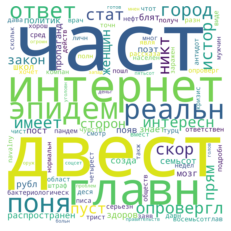

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1920,height=1920, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict(l_2))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
import pymorphy2, nltk
# https://pymorphy2.readthedocs.io/en/stable/user/guide.html

def pos_tag_rus(word_list):
    # POS tag the entire concordance.
    tokens = []
    morph = pymorphy2.MorphAnalyzer()

    for i in word_list:
        w, count = i
        j = morph.parse(w)[0]
        tokens.append((w, j.tag.POS))

    return tokens

In [15]:
print(pos_tag_rus(l_2))

[('част', 'ADJS'), ('двест', 'NOUN'), ('интернет', 'NOUN'), ('главн', 'NOUN'), ('эпидем', 'VERB'), ('реальн', 'NOUN'), ('поня', 'GRND'), ('ответ', 'NOUN'), ('город', 'NOUN'), ('опровергл', 'ADJS'), ('истор', 'NOUN'), ('имеет', 'VERB'), ('стат', 'NOUN'), ('никт', 'NOUN'), ('скор', 'ADJS'), ('интересн', None), ('пуст', 'ADJS'), ('прям', 'PRCL'), ('сторон', 'NOUN'), ('закон', 'NOUN'), ('женщин', 'NOUN'), ('распространен', 'PRTS'), ('поэт', 'NOUN'), ('блят', 'VERB'), ('знает', 'VERB'), ('семьсот', 'NUMR'), ('политик', 'NOUN'), ('появ', 'GRND'), ('здоров', 'ADJS'), ('мозг', 'NOUN'), ('пропаганд', 'NOUN'), ('созда', 'NOUN'), ('школ', 'NOUN'), ('пост', 'NOUN'), ('рубл', 'NOUN'), ('бактериологическ', 'NOUN'), ('виде', 'NOUN'), ('сред', 'NOUN'), ('пандем', 'NOUN'), ('антидот', 'NOUN'), ('глав', 'NOUN'), ('чувств', 'NOUN'), ('деся', 'GRND'), ('чтот', 'NOUN'), ('давн', 'NOUN'), ('ответствен', 'ADJS'), ('недел', 'NOUN'), ('трист', 'ADJS'), ('опроверг', 'VERB'), ('компан', 'NOUN'), ('мног', 'NOUN')

In [16]:
ls = pos_tag_rus(l_2)

counts = Counter()
tag_list = []
for tags in ls:
    w, word_type = tags
    tag_list.append(word_type)
b = [word for word in tag_list if word is not None]
Counter(b)

Counter({'ADJS': 11,
         'NOUN': 65,
         'VERB': 7,
         'GRND': 4,
         'PRCL': 1,
         'PRTS': 4,
         'NUMR': 3,
         'ADVB': 1})

In [17]:
words_iso = []
for k,v in l:
    words_iso.append(k)

In [18]:
print(len(words_iso))

80


In [19]:
words_all = []
for k,v in l_2:
    words_all.append(k)

In [20]:
print(len(words_all))

99


In [21]:
import pymorphy2, nltk
# https://pymorphy2.readthedocs.io/en/stable/user/guide.html

def pos_tag_rus(word_list):
    # POS tag the entire concordance.
    tokens = []
    morph = pymorphy2.MorphAnalyzer()

    for w in word_list:
        j = morph.parse(w)[0]
        tokens.append((w, j.tag.POS))

    return tokens

In [22]:
ls = [i for i in words_all if i not in words_iso]

tokens_ls = []
counts_ls = Counter()

for w in ls:
    tokens_ls.append(nltk.pos_tag(nltk.word_tokenize(w)))

for tags in tokens_ls:
    counts_ls += Counter(tag for word, tag in tags)

print(counts_ls)

ls_2 = [i for i in words_iso if i not in words_all]

tokens_ls_2 = []
counts_ls_2 = Counter()

# POS tag the entire concordance.
tokens_ls_2 = []
morph = pymorphy2.MorphAnalyzer()

for w in ls_2:
    j = morph.parse(w)[0]
    tokens_ls_2.append([w, j.tag.POS])

#print(tokens_ls_2)
for tags in tokens_ls_2:
    counts_ls_2 += Counter(tag for tag in tags)

print('\n')

print(counts_ls_2)

print(len(ls_2))
print(len(ls))

print(len(words_iso))
print(len(words_all))

Counter({'NN': 59})


Counter({'NOUN': 32, None: 3, 'эфир': 1, 'восем': 1, 'прав': 1, 'пыта': 1, 'российск': 1, 'карантин': 1, 'четыр': 1, 'плох': 1, 'ADJS': 1, 'работ': 1, 'факт': 1, 'сорок': 1, 'NUMR': 1, 'шестьдес': 1, 'никак': 1, 'ADVB': 1, 'должн': 1, 'чита': 1, 'случа': 1, 'семьдес': 1, 'бузов': 1, 'шест': 1, 'русск': 1, 'ADJF': 1, 'ситуац': 1, 'мест': 1, 'бородин': 1, 'украин': 1, 'информац': 1, 'девя': 1, 'GRND': 1, 'пятьдес': 1, 'шлок': 1, 'youtube': 1, 'cовиддевятнадца': 1, 'девян': 1, 'москв': 1, 'государств': 1, 'вирус': 1, 'восемьдес': 1, 'выбор': 1, 'написа': 1, 'миров': 1, 'лгбт': 1, 'групп': 1})
40
59
80
99
